In [8]:
# import dependencis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
# read csv data
customers = pd.read_csv('drive//My Drive//machine learning//Ecommerce Customers.csv')
customers.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [12]:
customers.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [13]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


# **data analysis**

In [14]:
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


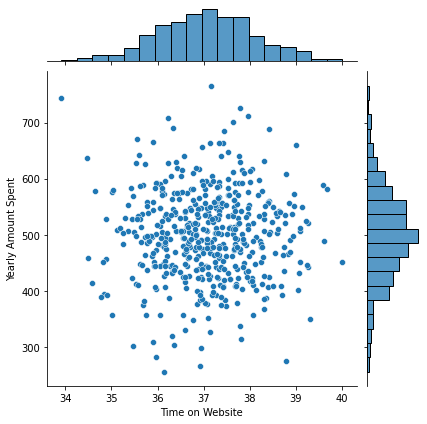

In [15]:
sns.jointplot(customers['Time on Website'], customers['Yearly Amount Spent'])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


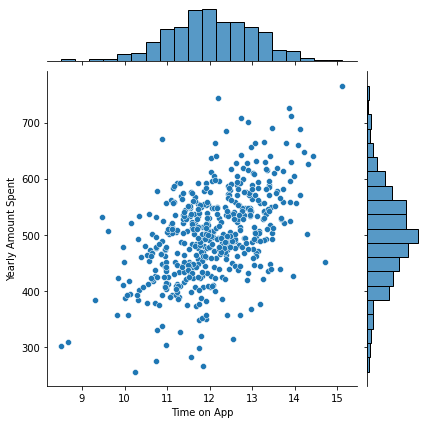

In [16]:
sns.jointplot(customers['Time on App'], customers['Yearly Amount Spent'])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


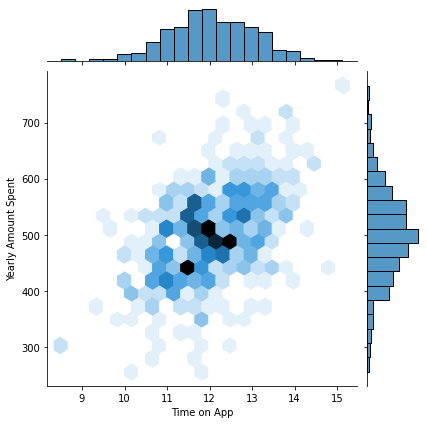

In [17]:
sns.jointplot(customers['Time on App'], customers['Yearly Amount Spent'],kind='hex')

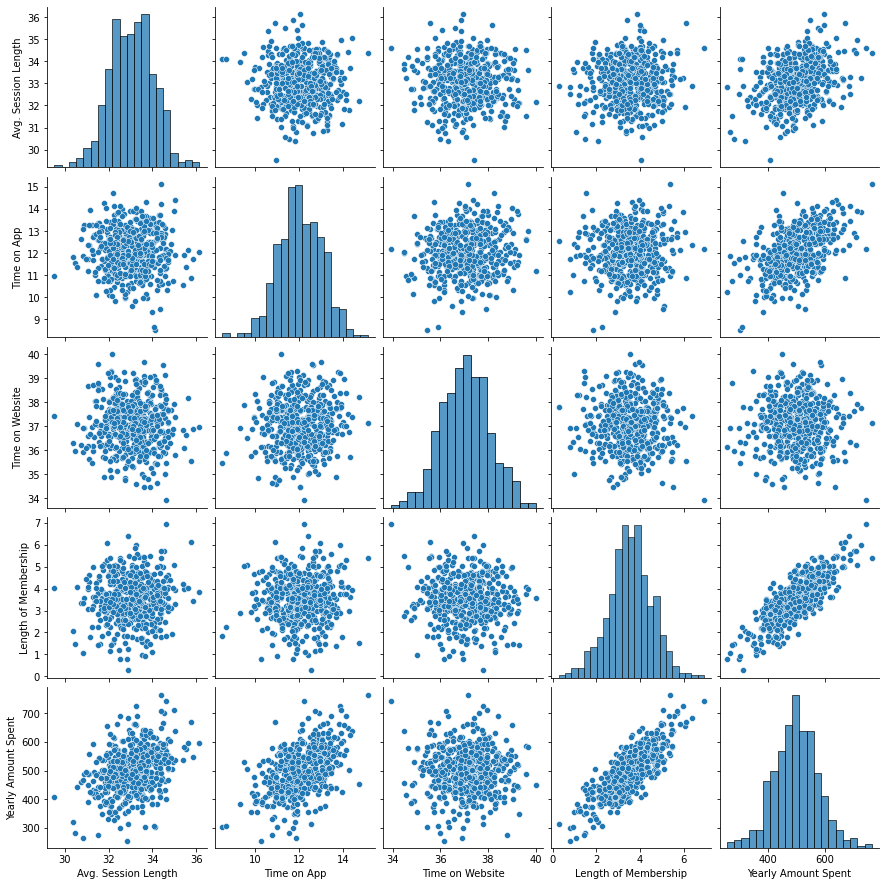

In [18]:
sns.pairplot(customers)

# Create a linear model with Yearly Amount Spent vs Length of Membership

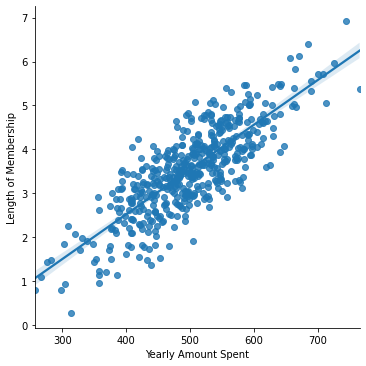

In [20]:
sns.lmplot(x='Yearly Amount Spent', y='Length of Membership', data=customers)

# **Training and Testing Data**

In [22]:
y = customers['Yearly Amount Spent']
X = customers[['Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership']]

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

# **Training the model**

In [24]:
from sklearn.linear_model import LinearRegression

In [25]:
# instance of model
lm = LinearRegression()

In [26]:
# fit on training data
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [27]:
# print coefficients of model
print("Coefficients: \n", lm.coef_)

Coefficients: 
 [25.98154972 38.59015875  0.19040528 61.27909654]


# **Predicting Test data**

Text(0, 0.5, 'Predicted Y')

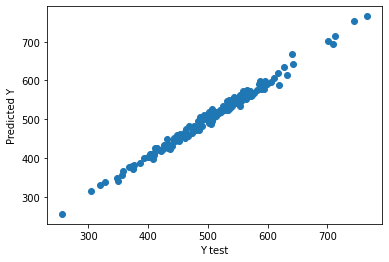

In [28]:
predictions = lm.predict(X_test)
# a scatterplot
plt.scatter(y_test, predictions)
plt.xlabel("Y test")
plt.ylabel("Predicted Y")

# **Evaluating the model**

In [29]:
# mean absolute error, mean squared error, root mean squared error
from sklearn import metrics

print("MAE: ",metrics.mean_absolute_error(y_test, predictions))
print("MSE: ",metrics.mean_squared_error(y_test, predictions))
print("RMSE: ",np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE:  7.2281486534308295
MSE:  79.8130516509743
RMSE:  8.933815066978626
